In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
df = pd.read_csv("../data/processed/clean_dataset.csv")

In [10]:
features = ["PE_Score","CU_Score","ATU_Score","AUP_Score","MIUA_Score"]
X = df[features]

In [11]:
df[["PE_Score","CU_Score","ATU_Score","AUP_Score","MIUA_Score"]].isnull().sum()

PE_Score      9
CU_Score      9
ATU_Score     9
AUP_Score     9
MIUA_Score    9
dtype: int64

In [12]:
X = df[["PE_Score","CU_Score","ATU_Score","AUP_Score","MIUA_Score"]].copy()

X = X.fillna(X.mean())

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

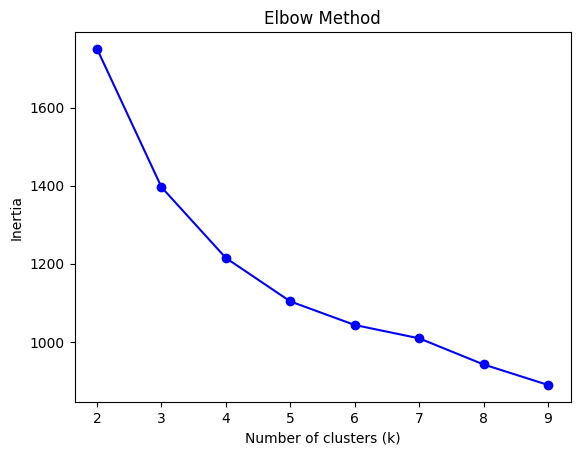

In [14]:
inertia = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [15]:
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette_score={score:.3f}")

k=2, silhouette_score=0.277
k=3, silhouette_score=0.258
k=4, silhouette_score=0.233
k=5, silhouette_score=0.206
k=6, silhouette_score=0.200


In [18]:
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df[["PE_Score","CU_Score","ATU_Score","AUP_Score","MIUA_Score","Cluster"]].head()

,PE_Score,CU_Score,ATU_Score,AUP_Score,MIUA_Score,Cluster
0,1.00,1.50,1.8,1.2,1.0,0
1,2.65,2.25,2.2,1.8,2.0,0
2,3.00,3.00,3.4,2.8,3.0,1
3,3.00,3.00,3.4,2.8,3.0,1
4,2.15,1.75,1.8,2.2,2.0,0


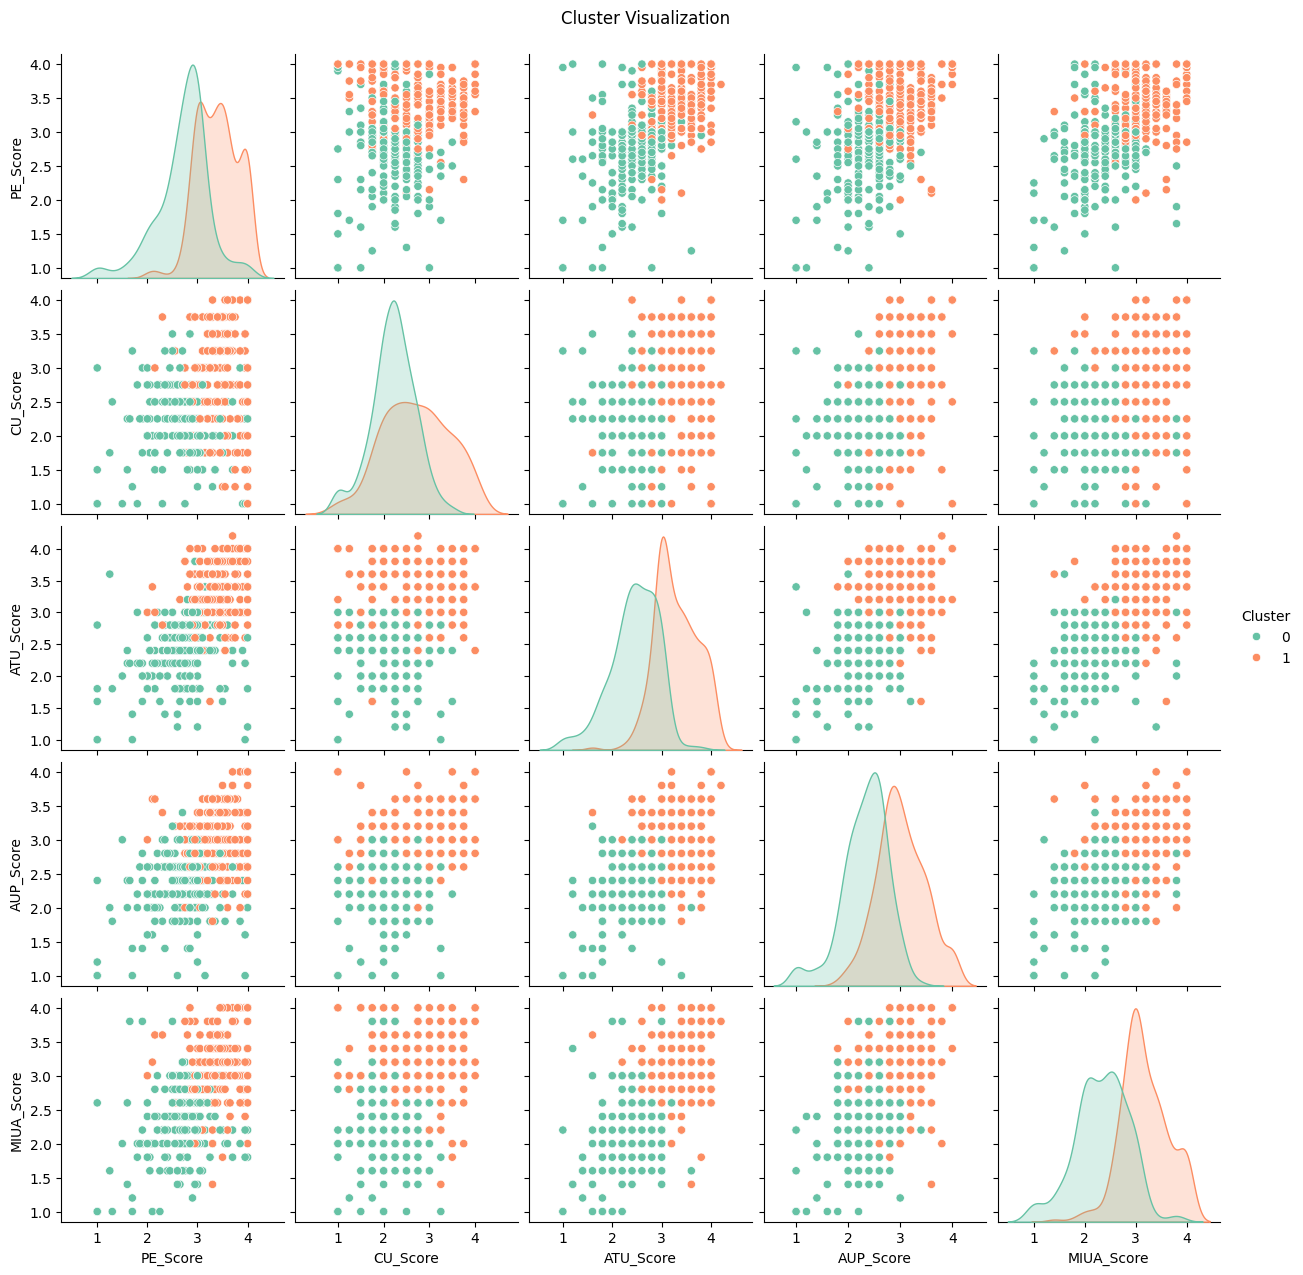

In [17]:
sns.pairplot(
    df,
    vars=["PE_Score","CU_Score","ATU_Score","AUP_Score","MIUA_Score"],
    hue="Cluster",
    palette="Set2"
)
plt.suptitle("Cluster Visualization", y=1.02)
plt.show()

         PE_Score  CU_Score  ATU_Score  AUP_Score  MIUA_Score
Cluster                                                      
0        2.714615  2.208654   2.442308   2.323077    2.331538
1        3.392293  2.710526   3.290977   3.018797    3.167669


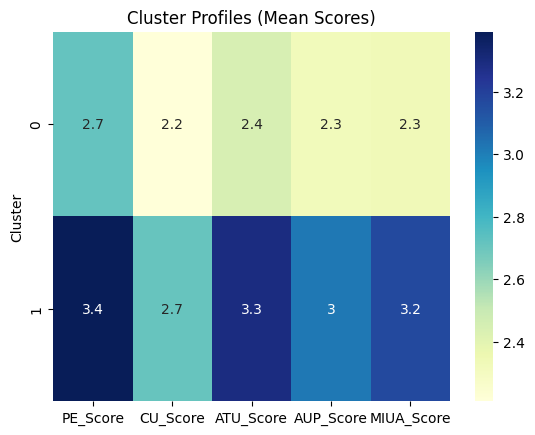

In [19]:
cluster_profile = df.groupby("Cluster")[features].mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="YlGnBu")
plt.title("Cluster Profiles (Mean Scores)")
plt.show()